In [1]:
#The basics
import pandas as pd
import numpy as np
import json

#Plotting
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import FCPython 

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Decide which league to load
#Wyscout data from https://figshare.com/collections/Soccer_match_event_dataset/4415000/2
with open('../Wyscout/events/events_England.json') as f:
    data = json.load(f)

In [3]:
#Create a data set of shots.
train = pd.DataFrame(data)
pd.unique(train['subEventName'])
shots=train[train['subEventName']=='Shot']
shots_model=pd.DataFrame(columns=['Goal','X','Y'])

In [4]:
#Go through the dataframe and calculate X, Y co-ordinates.
#Distance from a line in the centre
#Shot angle.
#Details of tags can be found here: https://apidocs.wyscout.com/matches-wyid-events
for i,shot in shots.iterrows():
    
    header=0
    for shottags in shot['tags']:
        if shottags['id']==403:
            header=1
    #Only include non-headers        
    if not(header):        
        shots_model.at[i,'X']=100-shot['positions'][0]['x']
        shots_model.at[i,'Y']=shot['positions'][0]['y']
        shots_model.at[i,'C']=abs(shot['positions'][0]['y']-50)
    
        #Distance in metres and shot angle in radians.
        x=shots_model.at[i,'X']*120/100
        y=shots_model.at[i,'C']*80/100
        shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
        a = np.arctan(7.32 *x /(x**2 + y**2 - (7.32/2)**2))
        if a<0:
            a=np.pi+a
        shots_model.at[i,'Angle'] =a
    
        #Was it a goal
        shots_model.at[i,'Goal']=0
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id']==101:
                    shots_model.at[i,'Goal']=1

In [5]:
#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])

In [6]:
def verticalPitchHS():
    # Draw the pitch
    fig, ax = plt.subplots(figsize=(16,11))
    fig.set_facecolor('#657c8f')
    ax.set_facecolor('#657c8f')

    pitch = VerticalPitch(pitch_type='statsbomb', 
                pitch_color='white', line_color='black', 
                positional=True, shade_middle=False, 
                positional_color='#657c8f', shade_color='#f2f2f2',
                axis=True, label=True,
                half=True)

    pitch.draw(ax=ax,  figsize=(16,11), constrained_layout=True, tight_layout=True)
    # plt.gca().invert_yaxis() 

    # Illuminate half-spaces
    rect1 = plt.Rectangle((18.2, 18.5), 11.6, 83.5, color="#8298ab", alpha=0.2)
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((50.2, 18.5), 11.6, 83.5, color="#8298ab", alpha=0.2)
    ax.add_patch(rect2) 

    x=[9,24,40,56,71]
    y=[10,30,50,70,90,110]
    col_labels = ['A', 'B', 'C', 'D', 'E']
    row_labels = range(6,0,-1)
    plt.xticks(x, col_labels)
    plt.yticks(y, row_labels)
    
    return fig, ax

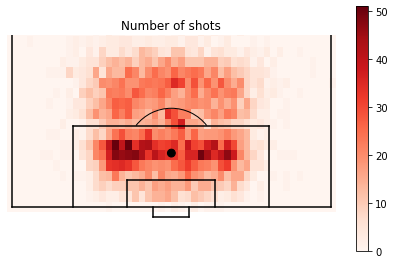

In [7]:
#Plot the number of shots from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# fig.savefig('../Output/NumberOfShots.pdf', dpi=None, bbox_inches="tight")   

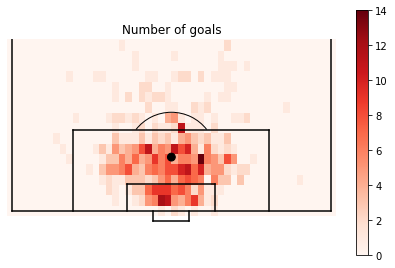

In [8]:
#Plot the number of GOALS from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# fig.savefig('../Output/NumberOfGoals.pdf', dpi=None, bbox_inches="tight")

<ipython-input-9-586d27669e50>:3: RuntimeWarning: invalid value encountered in true_divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


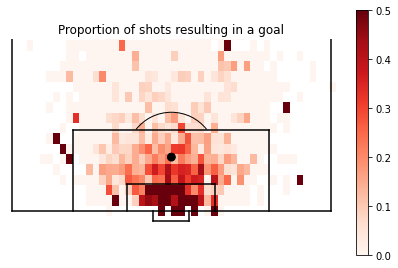

In [9]:
#Plot the probability of scoring from different points
(fig,ax) = FCPython.createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# fig.savefig('../Output/ProbabilityOfScoring.pdf', dpi=None, bbox_inches="tight")   